<p><a id="top"> </a></p>

# Master M2 MVA 2018/2019 - Graphical models - Homework 2


<h4>Students</h4>
<ul>
    <li>Grégoire Boussac</li>
    <li>Matthieu Toulemont</li>
</ul>

<ul>
    <li><a href ='#1'>Implementation - Gaussian Mixtures</a></li>
    <ul>
        <li><a href ='#1.1'>Question (a) </a> </li>
        <li><a href ='#1.2'>Question (b) </a> </li>
        <li><a href ='#1.3'>Question (c) </a></li>
        <li><a href ='#1.4'>Question (d) </a></li>
    </ul>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

apply = lambda func,x: list(map(func, x))

from random import choice, choices

In [2]:
df = pd.read_csv('EMGaussian.data', header = None, sep =' ')
df.columns = ['x1', 'x2']

<h3><a id = "1">Implementation - Gaussian Mixtures</a></h3>

<h4><a>Question (a) : K-Means</a></h4>


We will the distortion to compare the results of the K-Means. 

$$D = \frac{1}{2nK}\sum_{i = 1}^n\sum_{k = 1}^K z_{i,k}||x_i - \mu_k||^2$$

In [3]:
distortion = lambda df, closest, centroids:np.sum(list((np.sum(np.linalg.norm(df.loc[Closest == k] - centroids[k,:], axis = 1)**2) for k in range(K))))/(2*df.shape[0])*centroids.shape[0]

In [4]:
def plot_data_clusters(df, centroids, D):
    cols = ['red', 'blue', 'green', 'orange']
    K = np.shape(centroids)[0]
    plt.figure(figsize = (10,10))
    for i in range(K):
        Closest = np.argmin(np.hstack((np.linalg.norm(df.values - centroids[i,:], axis = 1).reshape(-1,1) for i in range(4))), axis = 1)
        plt.scatter(df.loc[np.where(Closest == i)]['x1'], df.loc[np.where(Closest == i)]['x2'], c=cols[i], alpha=0.5)
        plt.scatter(centroids[i,0], centroids[i,1], c='black', marker = "X", linewidths=4)
    plt.title('K-Means : $D = {}$'.format(np.round(D, 5)))
    plt.show()

- Random initialization :

In [5]:
K = 4
Niter = 10
M = 1000
list_D = []

for m in tqdm(range(M)):
    centroids = np.random.uniform(-10,10, size = (K,2))
    for i in range(Niter):
        Closest = np.argmin(np.hstack((np.linalg.norm(df.values - centroids[i,:], axis = 1).reshape(-1,1) for i in range(4))), axis = 1)
        centroids = np.vstack((df.loc[np.where(Closest == i)].mean(axis = 0).values.reshape(1,-1) for i in range(4)))
    Closest = np.argmin(np.hstack((np.linalg.norm(df.values - centroids[i,:], axis = 1).reshape(-1,1) for i in range(4))), axis = 1)

    D = distortion(df, Closest, centroids)
    
    if not np.isnan(D):
        list_D.append(D)
                
print("Mean distortion : ", np.mean(list_D))

100%|██████████| 1000/1000 [00:46<00:00, 21.63it/s]

Mean distortion :  14.1728396088


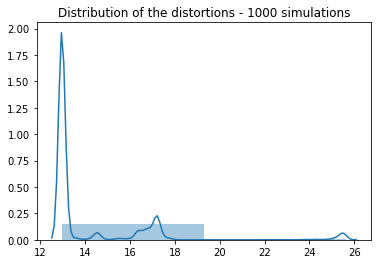

In [6]:
sns.distplot(list_D, bins=2)
plt.title('Distribution of the distortions - {} simulations'.format(M))

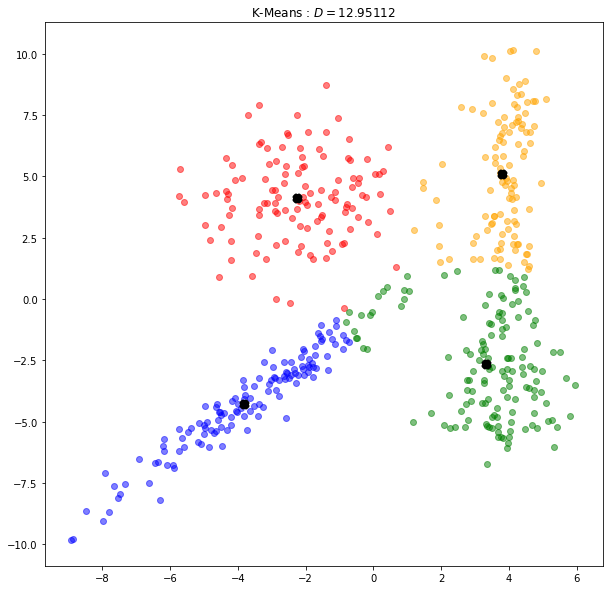

In [7]:
# Last clustering
plot_data_clusters(df, centroids, D)

- Random initialization taken from the data points :

In [8]:
K = 4
Niter = 10
M = 1000
list_D = []

for m in tqdm(range(M)):
    centroids = np.array([list(choice(df.values)) for k in range(K)])
    for i in range(Niter):
        Closest = np.argmin(np.hstack((np.linalg.norm(df.values - centroids[i,:], axis = 1).reshape(-1,1) for i in range(4))), axis = 1)
        centroids = np.vstack((df.loc[np.where(Closest == i)].mean(axis = 0).values.reshape(1,-1) for i in range(4)))
    Closest = np.argmin(np.hstack((np.linalg.norm(df.values - centroids[i,:], axis = 1).reshape(-1,1) for i in range(4))), axis = 1)

    D = distortion(df, Closest, centroids)
    
    if not np.isnan(D):
        list_D.append(D)
    
print("Mean distortion : ", np.mean(list_D))

100%|██████████| 1000/1000 [00:45<00:00, 22.02it/s]

Mean distortion :  14.1122123332


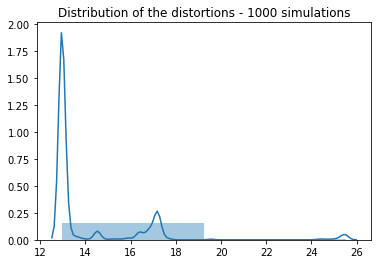

In [9]:
sns.distplot(list_D, bins=2)
plt.title('Distribution of the distortions - {} simulations'.format(M))

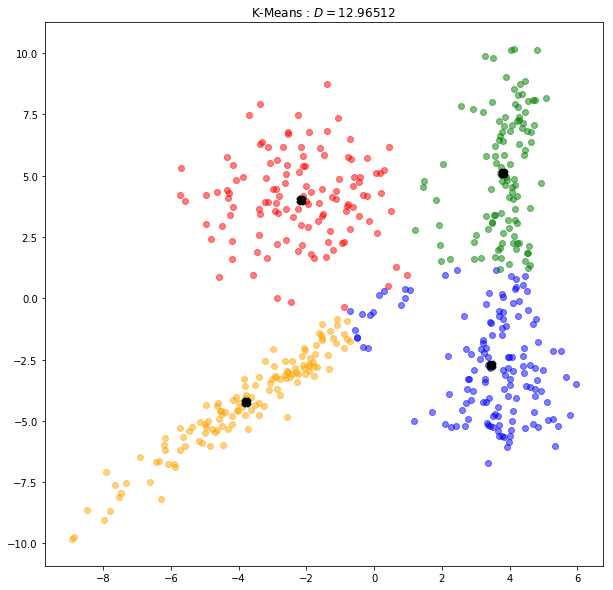

In [10]:
# Last clustering
plot_data_clusters(df, centroids, D)

- KMeans++ :

In [11]:
def get_centroids(K):
    centroids = np.random.uniform(-10,10, size = (1,2))
    for k in range(K-1):
        dist = []
        for x in df.values:
            dist.append(get_min_distance(x, centroids))
        
        new_centroid = np.array(choices(population=df.values, weights=dist))    
        centroids = np.concatenate((centroids, new_centroid))
        
    return centroids

In [12]:
def get_min_distance(x, centroids):
    return min([np.linalg.norm(x-centroid) for centroid in centroids])

In [13]:
K = 4
Niter = 10
M = 1000
list_D = []

for m in tqdm(range(M)):
    centroids = get_centroids(K)
    for i in range(Niter):
        Closest = np.argmin(np.hstack((np.linalg.norm(df.values - centroids[i,:], axis = 1).reshape(-1,1) for i in range(4))), axis = 1)
        centroids = np.vstack((df.loc[np.where(Closest == i)].mean(axis = 0).values.reshape(1,-1) for i in range(4)))
    Closest = np.argmin(np.hstack((np.linalg.norm(df.values - centroids[i,:], axis = 1).reshape(-1,1) for i in range(4))), axis = 1)

    D = distortion(df, Closest, centroids)
    
    if not np.isnan(D):
        list_D.append(D)
        
print("Mean distortion : ", np.mean(list_D))

100%|██████████| 1000/1000 [01:15<00:00, 13.32it/s]

Mean distortion :  13.7578732159


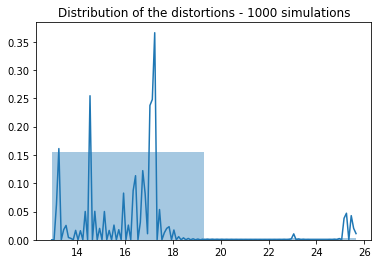

In [14]:
sns.distplot(list_D, bins=2)
plt.title('Distribution of the distortions - {} simulations'.format(M))

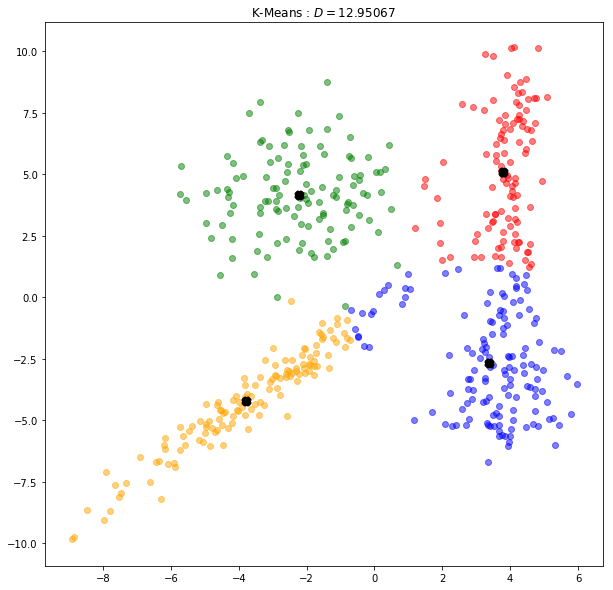

In [15]:
# Last clustering
plot_data_clusters(df, centroids, D)

<h4><a id = "1.2">Question (b) Gaussian Mixture Implementation with covariance proportional to Identity</a></h4>
Let $Z$ be a multinomial variable taking values between $1$ and $K$ with probabilities $(\Pi_k)_{k = 1}^K$. Let $z$ be its one-hot encoding.
<ul>
    <li> $ \forall k \in \{1,..,K\} z_k \in \{0,1\}$</li>
    <li> $x|(z_k = 1) \overset{\mathcal{L}}{=}\mathcal{N}(\mu_k, \alpha_k I_d)$</li>
    <li> $d$ is the number of dimension of $x$</li>
</ul>

We now have $n$ observations $(x_i)_{i = 1}^n$

We will call $\Theta$ the set of all parameters.

We introduce the latent variable at iteration $t$ : $w_{i,k} = p(z_k = 1 | x_i)$

The expected log-likelihood is : 
    $$l(\Theta)  = \sum_{i,k} w_{i,k} \log{p(z_k|\Theta)} + \sum_{i,k} w_{i,k} \log{p(x_i|z_k, \Theta)}$$
        $$l(\Theta)  = \sum_{i,k} w_{i,k} \log{\Pi_k} -\sum_{i,k} w_{i,k} (\log{2\pi}+\frac{1}{2}\log{\det{\Sigma_k}}+ \frac{1}{2}(x_i - \mu_k)^T\Sigma_k^{-1}(x_i - \mu_k)) $$
   

In [16]:
def loglikelihood(df, PIs, mus, sigmas):
    l1 = np.sum(m_weights*np.log(np.repeat(PIs.reshape(1,4), df.shape[0], axis = 0)))
    l2 = -1*np.sum(list((m_weights[i,k]*(\
                            np.log(2*np.pi)+ 0.5*np.log(np.linalg.det(Sigmas[k,:])) \
                            + 0.5*(df.values[i,:] -mus[k,:]).T.dot(np.linalg.inv(Sigmas[k,:])).dot(df.values[i,:]-mus[k,:]) ))\
                                for i in range(df.shape[0]) for k in range(K) ) )
    return l1+l2

<h5>E-step : Update of the latent variable.</h5>

The update of the latent variable is : 

$$w_{i,k} = \frac{p(z_k=1|\Theta)p(x_i|z_k=1, \Theta)}{\sum_{m=1}^Kp(z_m = 1|\Theta)p(x_i|z_m=1, \Theta)}$$

$$w_{i,k} = \frac{\Pi_k \mathcal{N}(x_i, \mu_k, \alpha_k I_d)}{\sum_{m=1}^K\Pi_m \mathcal{N}(x_i, \mu_m, \alpha_k I_d)}$$

<h5>M-step : Update of the parameters</h5>

The log likelihood is : 

$$l(\Theta)  = \sum_{i,k} w_{i,k} \log{p(z_k|\Theta)} + \sum_{i,k} w_{i,k} \log{p(x_i|z_k, \Theta)}$$

Which we can decompose in two sub loglikelihoods : 

\begin{equation}
l_1(\Theta) = \sum_{i,k} w_{i,k} \log{p(z_k|\Theta)} \quad l_2(\Theta)=\sum_{i,k} w_{i,k} \log{p(x_i|z_k, \Theta)}
\end{equation}

$l_1$ is a concave function. We need to maximize it under the constrain that $\sum_k \Pi_k = 1$. 


We obtain the MLE for $l_1$ : $\Pi_k^ = \frac{\sum_{i = 1}^n w_{i,k}}{\sum_{i = 1, k} w_{i,k}}$



As $l_2$ is not concave, we first maximize it along the $(\mu_k)_{k=1}^K$ and then along the $\alpha_k$. 

We obtain : 

\begin{equation}
   \forall k \in \{1,..,K\}, \hat{\mu_k} = \frac{\sum_{i = 1}^n w_{i,k}x_i}{\sum_{i = 1, k} w_{i,k}}
     \quad 
     \hat{\alpha_k} = \frac{\sum_{i = 1}^n w_{i,k}||x_i - \hat{\mu_k}||^2}{d\sum_{i = 1, k} w_{i,k}}
\end{equation}


If we use 

In [17]:
pdf = lambda x,mu, Sigma: 1/(2*np.pi*np.power(np.linalg.det(Sigma),0.5))*np.exp(-0.5*(x - mu).T.dot(np.linalg.inv(Sigma)).dot(x - mu))

weigths = lambda x,mu,Sigma, PI: PI*pdf(x,mu,Sigma)

<h5>Initialization</h5>
We will use the K-Means results above for initialization. 

In [18]:
K = 4
Niter = 10

PIs = np.array(list((Closest == i).sum() for i in range(K)))/df.shape[0]
mus = centroids
Sigmas = np.vstack((df.loc[np.where(Closest == i)].cov().values.reshape(1,2,2) for i in range(4)))

<h5>EM implementation</h5>

In [19]:
LogB = np.zeros(Niter)
for Iter in range(Niter):
    # E step : Compute membership weights:
    m_weights = np.vstack(list(np.array(list(weigths(df.values[i,:], mus[k], Sigmas[k], PIs[k]) for k in range(K))).reshape(1,-1) for i in range(df.shape[0])))
    m_weights /= np.repeat(m_weights.sum(axis = 1, keepdims=True),4,axis = 1)
    # M Step : Update parameters
    N = np.sum(m_weights, axis = 0)
    PIs = N/df.shape[0]
    mus = np.vstack(list(((np.repeat(m_weights[:,k].reshape(-1,1), 2, axis = 1)*df.values).sum(axis = 0)/N[k]).reshape(1,-1) for k in range(K)))
    Sigmas = np.vstack(list(((0.5*np.eye(2)*np.sum((np.linalg.norm(df.values - mus[k,:], axis = 1)**2)*m_weights[:,k])/N[k]).reshape(1,2,2) for k in range(K))))
    LogB[Iter] = loglikelihood(df, PIs, mus, Sigmas)

<h4>Results and quantiles isocurves</h4>

We want to plot the 90% quantile for each Gaussian. We are looking for the isocurve $(x- \mu)^T\Sigma^{-1}(x- \mu) = c$ and $c$ must reflect the desired quantile.


For a given gaussian (centered with diagonal covariance matrice) we must integrate its density function and set its intergral to 1-90%.

We will use the change in variable $z = (\frac{x}{\sigma_x})^2+(\frac{y}{\sigma_y})^2$ and will integrate for $z$ going from $0$ to $\sqrt{c}$ and $\theta = 0$ to $2\pi$

\begin{equation}
    1-\alpha =  \int_0^{\sqrt{c}} \frac{z e^{-\frac{z^2}{2}}}{2\pi}dz \int_0^{2 \pi} = \int_0^{\sqrt{c}} z e^{-\frac{z^2}{2}}dz
\end{equation}

Using the change in variable : $t = \frac{-z^2}{2}, dt = -2zdz$ we have : 

\begin{equation}
    1-\alpha = \int_0^{\sqrt{c}} z e^{-\frac{z^2}{2}}dz = \int_{-\frac{c}{2}}^0 e^s ds = 1-e^{-\frac{c}{2}}
\end{equation}

So $c = -2\ln(\alpha)$. 

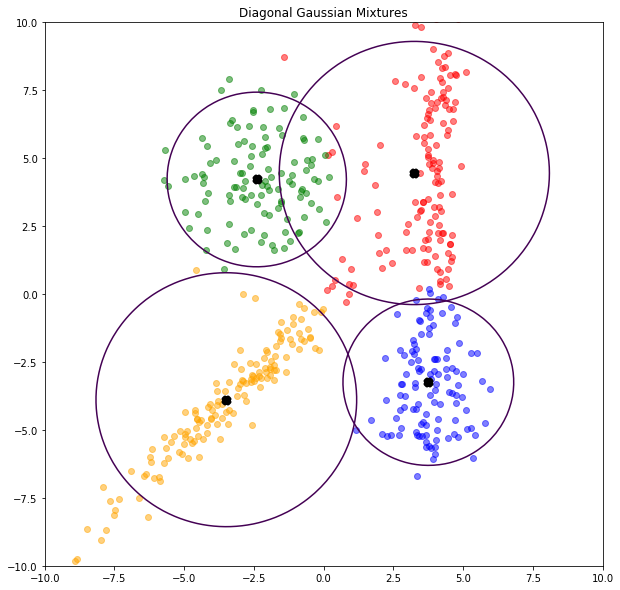

In [20]:
N = 100
x = np.linspace(-10,10,N)
y = np.linspace(-10,12,N)
x, y = np.meshgrid(x,y)
Z = np.zeros((4,N,N))
for i in range(100):
    for j in range(100):
        X = np.array([x[i,j], y[i,j]])
        for k in range(4):
            Z[k,i,j] = (X - mus[k,:]).T.dot(np.linalg.inv(Sigmas[k,:,:])).dot((X - mus[k,:]))
            #Z[k,i,j] = (X - mus[k,:]).T.dot(C*np.eye(2)).dot((X - mus[k,:])) #Diagonal covriance matrice

Closest = np.argmax(m_weights, axis = 1)
cols = ['red', 'blue', 'green', 'orange']
plt.figure(figsize = (10,10))
for i in range(4):
    plt.scatter(df.loc[np.where(Closest == i)]['x1'], df.loc[np.where(Closest == i)]['x2'], c=cols[i], alpha=0.5)
    plt.scatter(mus[i,0], mus[i,1], c='black', marker = "X",linewidths=4)
    plt.contour(x,y,Z[i], [-2*np.log(0.1)])
plt.title('Diagonal Gaussian Mixtures')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.savefig('DEM.eps', format='eps', dpi=100)
plt.show()

<h4><a id ="1.3">Question (c) General Gaussian Mixture Implementation</a></h4>


Let $Z$ be a multinomial variable taking values between $1$ and $K$ with probabilities $(\Pi_k)_{k = 1}^K$. Let $z$ be its one-hot encoding.
<ul>
    <li> $ \forall k \in \{1,..,K\} z_k \in \{0,1\}$</li>
    <li> $x|(z_k = 1) \overset{\mathcal{L}}{=}\mathcal{N}(\mu_k, \Sigma_k)$</li>
</ul>

We now have $n$ observations $(x_i)_{i = 1}^n$

We will call $\Theta$ the set of all parameters.

We introduce the latent variable at iteration $t$ : $w_{i,k} = p(z_k = 1 | x_i)$

The expected log-likelihood is : 
    $$l(\Theta)  = \sum_{i,k} w_{i,k} \log{p(z_k|\Theta)} + \sum_{i,k} w_{i,k} \log{p(x_i|z_k, \Theta)}$$
    
<h5>E-step : Update of the latent variable.</h5>

The update of the latent variable is : 

$$w_{i,k} = \frac{p(z_k=1|\Theta)p(x_i|z_k=1, \Theta)}{\sum_{m=1}^Kp(z_m = 1|\Theta)p(x_i|z_m=1, \Theta)}$$

$$w_{i,k} = \frac{\Pi_k \mathcal{N}(x_i, \mu_k, \Sigma_k)}{\sum_{m=1}^K\Pi_m \mathcal{N}(x_i, \mu_m, \Sigma_m)}$$

<h5>M-step : Update of the parameters</h5>

The log likelihood is : 

$$l(\Theta)  = \sum_{i,k} w_{i,k} \log{p(z_k|\Theta)} + \sum_{i,k} w_{i,k} \log{p(x_i|z_k, \Theta)}$$

Which we can decompose in two sub loglikelihoods : 

\begin{equation}
l_1(\Theta) = \sum_{i,k} w_{i,k} \log{p(z_k|\Theta)} \quad l_2(\Theta)=\sum_{i,k} w_{i,k} \log{p(x_i|z_k, \Theta)}
\end{equation}

$l_1$ is a concave function. We need to maximize it under the constrain that $\sum_k \Pi_k = 1$. 


We obtain the MLE for $l_1$ : $\Pi_k^ = \frac{\sum_{i = 1}^n w_{i,k}}{\sum_{i = 1, k} w_{i,k}}$



As $l_2$ is not concave, we first maximize it along the $(\mu_k)_{k=1}^K$ and then along the $(\Sigma_k)_{k=1}^K$. 

We obtain : 

\begin{equation}
   \forall k \in \{1,..,K\}, \hat{\mu_k} = \frac{\sum_{i = 1}^n w_{i,k}x_i}{\sum_{i = 1, k} w_{i,k}}
     \quad 
     \hat{\Sigma_k} = \frac{\sum_{i = 1}^n w_{i,k}(x_i - \hat{\mu_k})^T(x_i - \hat{\mu_k})}{\sum_{i = 1, k} w_{i,k}}
\end{equation}

In [21]:
pdf = lambda x,mu, Sigma: 1/(2*np.pi*np.power(np.linalg.det(Sigma),0.5))*np.exp(-0.5*(x - mu).T.dot(np.linalg.inv(Sigma)).dot(x - mu))

weigths = lambda x,mu,Sigma, PI: PI*pdf(x,mu,Sigma)

<h5>Initialization</h5>
We will use the K-Means results above for initialization. 

In [22]:
K = 4
Niter = 10

PIs = np.array(list((Closest == i).sum() for i in range(K)))/df.shape[0]
mus = centroids
Sigmas = np.vstack((df.loc[np.where(Closest == i)].cov().values.reshape(1,2,2) for i in range(4)))

<h4>Expectation-Maximization</h4>

In [23]:
LogC = np.zeros(Niter)
for Iter in range(Niter):
    # E step : Compute membership weights:
    m_weights = np.vstack(list(np.array(list(weigths(df.values[i,:], mus[k], Sigmas[k], PIs[k]) for k in range(K))).reshape(1,-1) for i in range(df.shape[0])))
    m_weights /= np.repeat(m_weights.sum(axis = 1, keepdims=True),4,axis = 1)
    
    # M Step : Update parameters
    N = np.sum(m_weights, axis = 0)
    PIs = N/df.shape[0]
    mus = np.vstack(list(((np.repeat(m_weights[:,k].reshape(-1,1), 2, axis = 1)*df.values).sum(axis = 0)/N[k]).reshape(1,-1) for k in range(K)))
    Sigmas = np.vstack(list((((np.repeat(m_weights[:,k].reshape(-1,1), 2, axis = 1)*(df.values - mus[k,:])).T.dot(df.values - mus[k,:])/N[k]).reshape(1,2,2) for k in range(K))))
    LogC[Iter] = loglikelihood(df, PIs, mus, Sigmas)
    
# Last E step : Compute membership weights:
m_weights = np.vstack(list(np.array(list(weigths(df.values[i,:], mus[k], Sigmas[k], PIs[k]) for k in range(K))).reshape(1,-1) for i in range(df.shape[0])))
m_weights /= np.repeat(m_weights.sum(axis = 1, keepdims=True),4,axis = 1)  

<h4>Results and quantiles isocurves</h4>

In the general case, when $\Sigma$ is not diagonal, we can diagonalize it such that : $\Sigma = P^TDP$. Our isocurve becomes : 
\begin{equation}
(P(x- \mu))^TD^{-1}P(x- \mu) = c
\end{equation}

Which brings us back
to the former case.

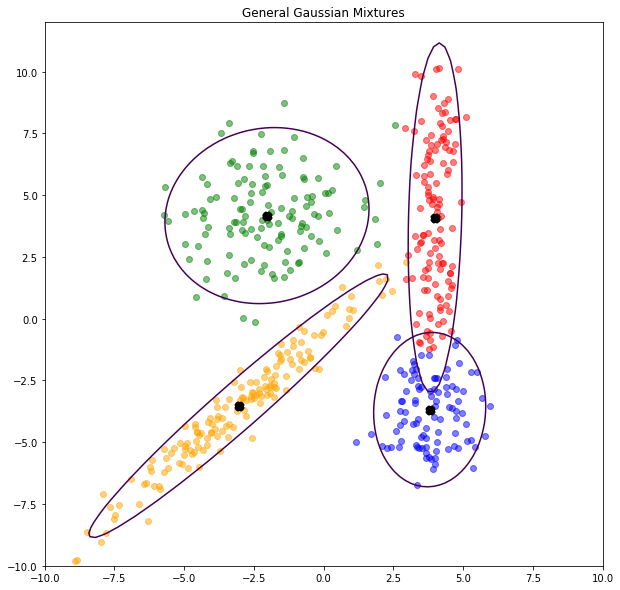

In [24]:
N = 100
x = np.linspace(-10,10,N)
y = np.linspace(-10,12,N)
x, y = np.meshgrid(x,y)
Z = np.zeros((4,N,N))
for i in range(100):
    for j in range(100):
        X = np.array([x[i,j], y[i,j]])
        for k in range(4):
            Z[k,i,j] = (X - mus[k,:]).T.dot(np.linalg.inv(Sigmas[k,:,:])).dot((X - mus[k,:]))
            

Closest = np.argmax(m_weights, axis = 1)
cols = ['red', 'blue', 'green', 'orange']
plt.figure(figsize = (10,10))
for i in range(4):
    plt.scatter(df.loc[np.where(Closest == i)]['x1'], df.loc[np.where(Closest == i)]['x2'], c=cols[i], alpha=0.5)
    plt.scatter(mus[i,0], mus[i,1], c='black', marker = "X",linewidths=4)
    plt.contour(x,y,Z[i], [-2*np.log(0.1)])
plt.title('General Gaussian Mixtures')
plt.show()

<h4><a id = "1.4">Question (d) Comparison of the log-likelihoods.</a></h4>


The expected log-likelihood is : 
    $$l(\Theta)  = \sum_{i,k} w_{i,k} \log{p(z_k|\Theta)} + \sum_{i,k} w_{i,k} \log{p(x_i|z_k, \Theta)}$$
    $$l(\Theta)  = \sum_{i,k} w_{i,k} \log{\Pi_k} -\sum_{i,k} w_{i,k} (\log{2\pi}+\frac{1}{2}\log{\det{\Sigma_k}}+ \frac{1}{2}(x_i - \mu_k)^T\Sigma_k^{-1}(x_i - \mu_k)) $$

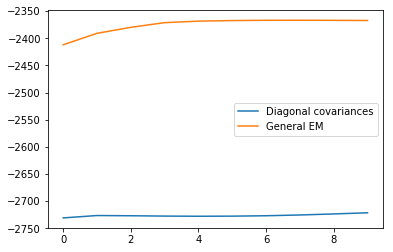

In [25]:
plt.plot(LogB, label="Diagonal covariances")
plt.plot(LogC, label="General EM")
plt.legend()
plt.show()